In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import cv2

In [2]:
uploaded = files.upload()

Saving 1_1.jpg to 1_1.jpg
Saving 1_2.jpg to 1_2.jpg
Saving 1_3.jpg to 1_3.jpg
Saving 1_4.jpg to 1_4.jpg
Saving 1_5.jpg to 1_5.jpg
Saving 1_6.jpg to 1_6.jpg
Saving 1_7.jpg to 1_7.jpg
Saving 1_8.jpg to 1_8.jpg
Saving 1_9.jpg to 1_9.jpg
Saving 1_10.jpg to 1_10.jpg
Saving 4_1.jpg to 4_1.jpg
Saving 4_2.jpg to 4_2.jpg
Saving 4_3.jpg to 4_3.jpg
Saving 4_4.jpg to 4_4.jpg
Saving 4_5.jpg to 4_5.jpg
Saving 4_6.jpg to 4_6.jpg
Saving 4_7.jpg to 4_7.jpg
Saving 4_8.jpg to 4_8.jpg
Saving 4_9.jpg to 4_9.jpg
Saving 4_10.jpg to 4_10.jpg
Saving 6_1.jpg to 6_1.jpg
Saving 6_2.jpg to 6_2.jpg
Saving 6_3.jpg to 6_3.jpg
Saving 6_4.jpg to 6_4.jpg
Saving 6_5.jpg to 6_5.jpg
Saving 6_6.jpg to 6_6.jpg
Saving 6_7.jpg to 6_7.jpg
Saving 6_8.jpg to 6_8.jpg
Saving 6_9.jpg to 6_9.jpg
Saving 6_10.jpg to 6_10.jpg


In [3]:
print(uploaded.keys())

dict_keys(['1_1.jpg', '1_2.jpg', '1_3.jpg', '1_4.jpg', '1_5.jpg', '1_6.jpg', '1_7.jpg', '1_8.jpg', '1_9.jpg', '1_10.jpg', '4_1.jpg', '4_2.jpg', '4_3.jpg', '4_4.jpg', '4_5.jpg', '4_6.jpg', '4_7.jpg', '4_8.jpg', '4_9.jpg', '4_10.jpg', '6_1.jpg', '6_2.jpg', '6_3.jpg', '6_4.jpg', '6_5.jpg', '6_6.jpg', '6_7.jpg', '6_8.jpg', '6_9.jpg', '6_10.jpg'])


In [4]:
#muat dataset mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#tampilkan bentuk dataset
print(f"Shape x_train : {x_train.shape}")
print(f"Shape y_train : {y_train.shape}")
print(f"Shape x_test : {x_test.shape}")
print(f"Shape x_test : {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shape x_train : (60000, 28, 28)
Shape y_train : (60000,)
Shape x_test : (10000, 28, 28)
Shape x_test : (10000,)


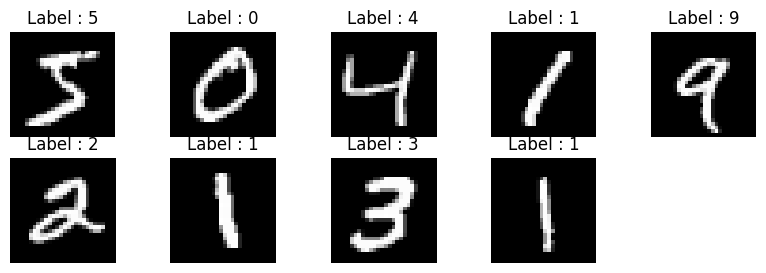

In [5]:
#Visualisasi gambar
plt.figure(figsize = (10, 3))
for i in range(9):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.title(f"Label : {y_train[i]}")
  plt.axis('off')
plt.show()

In [6]:
#normalisasi = ubah tipe data dan skala

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#reshape data : tambahkan dimensi channel dan pixel menjadi 28px

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


print(f"shape x_train setelah di reshape : {x_train.shape}")

shape x_train setelah di reshape : (60000, 28, 28, 1)


In [7]:
#one hot encode label

num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

print(f"shape y_train sebelum encoding : {y_train.shape}")
print(f"shape y_train setelah di encoding : {y_train_cat.shape}")
print(f"5 label pertama setelah encoding: \n {y_train_cat[:5]}")

shape y_train sebelum encoding : (60000,)
shape y_train setelah di encoding : (60000, 10)
5 label pertama setelah encoding: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [8]:
input_shape = (28, 28, 1)

#bangun model CNN
model = Sequential([
    #layer conv pertama
    Conv2D(32, kernel_size =(3, 3), activation = 'relu', input_shape = input_shape), MaxPooling2D((2,2)),

    #layer conv kedua
    Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),

    #flatten layer
    Flatten(),

    #fully connected layer dengan dropout
    Dense(128, activation = 'relu'),
    Dropout(0.5), #mencegah overfitting

    #output layer (10 kelas, softwre untuk kjlasifikasi)
    Dense(num_classes, activation = 'softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#Kompilasi model

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
#Pelatihan model
batch_size = 128
epochs = 10

#latih modelnya
print("training..,.,.,")
history = model.fit(x_train, y_train_cat,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 1,
                   validation_data = (x_test, y_test_cat))
print("done")

training..,.,.,
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 112ms/step - accuracy: 0.8057 - loss: 0.6235 - val_accuracy: 0.9795 - val_loss: 0.0630
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 51s 109ms/step - accuracy: 0.9689 - loss: 0.1067 - val_accuracy: 0.9858 - val_loss: 0.0429
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 105ms/step - accuracy: 0.9774 - loss: 0.0756 - val_accuracy: 0.9892 - val_loss: 0.0322
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 109ms/step - accuracy: 0.9825 - loss: 0.0603 - val_accuracy: 0.9891 - val_loss: 0.0343
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - accuracy: 0.9843 - loss: 0.0507 - val_accuracy: 0.9908 - val_loss: 0.0272
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 108ms/step - accuracy: 0.9858 - loss: 0.0457 - val_accuracy: 0.9903 - val_loss: 0.0275
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 111ms/step - accuracy: 0.9884 - loss: 0.0379 - val_accuracy: 0.9910 - val_loss: 0.0253
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 107ms/step - accuracy: 

In [11]:
score = model.evaluate(x_test, y_test_cat, verbose = 0)
print('-'* 40)
print(f"test loss: {score[0]:.4f}")
print(f"test accuracy: {score[1]*100:.2f}%")
print('-' * 40)

----------------------------------------
test loss: 0.0226
test accuracy: 99.24%
----------------------------------------


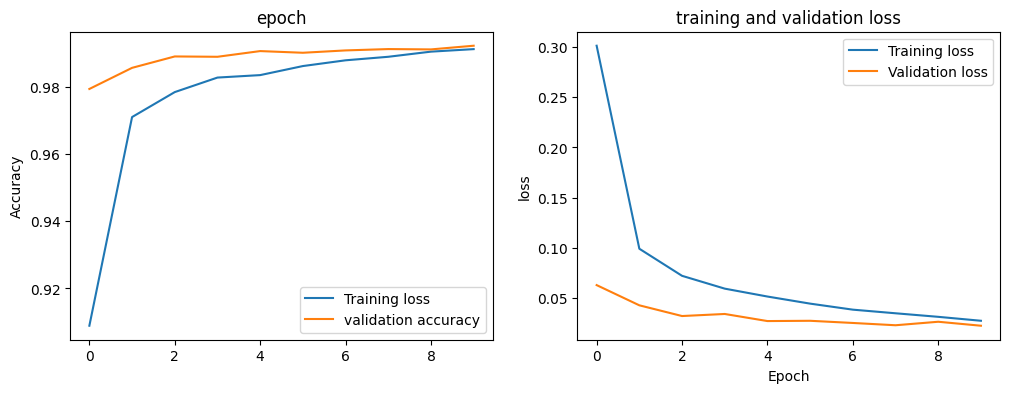

In [12]:
#plot accuracy

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title('training and validation accuracy')
plt.title('epoch')
plt.ylabel('Accuracy')
plt.legend()

#plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.title('training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

In [13]:
predictions = {}
data_citra = []   # untuk menyimpan gambar hasil preprocessing
label_citra = []   # label asli
file_names = []


for filename in uploaded.keys():
    # Ambil label dari nama file, misal "2_4.png" -> label = 2
    true_label = int(filename.split('_')[0])
    label_citra.append(true_label)
    file_names.append(filename)

    # Baca gambar
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Inversi warna (karena MNIST: background hitam, angka putih)
    img_inverted = cv2.bitwise_not(img)

    # Resize ke 28x28
    img_resized = cv2.resize(img_inverted, (28, 28))

    # Normalisasi (0–1)
    img_normalized = img_resized / 255.0

    # Reshape agar cocok untuk CNN (1 channel)
    img_ready = img_normalized.reshape(28, 28, 1)
    data_citra.append(img_ready)

In [14]:
data_citra = np.array(data_citra)
data_citra = data_citra.reshape(-1, 28, 28, 1)

print("Jumlah citra siap prediksi:", data_citra.shape[0])
print("Contoh dimensi citra:", data_citra[0].shape)

Jumlah citra siap prediksi: 30
Contoh dimensi citra: (28, 28, 1)


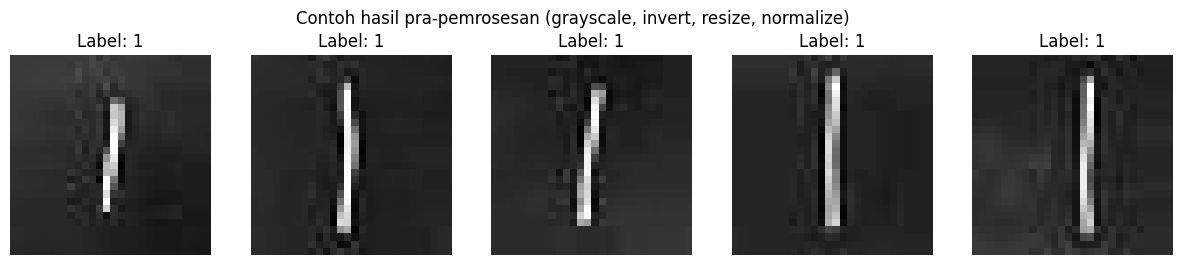

In [15]:
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(data_citra[i].squeeze(), cmap='gray')
    plt.title(f"Label: {label_citra[i]}")
    plt.axis('off')
plt.suptitle("Contoh hasil pra-pemrosesan (grayscale, invert, resize, normalize)")
plt.show()

In [16]:
pred = model.predict(data_citra)
hasil = np.argmax(pred, axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


In [17]:
benar = 0
print("\n=== HASIL PREDIKSI SETIAP CITRA ===\n")
for i, (true, pred, fname) in enumerate(zip(label_citra, hasil, file_names), start=1):
    status = "Benar" if true == pred else "Salah"
    if true == pred:
        benar += 1
    print(f"Citra ke-{i} ({fname}) → Label Asli: {true} | Prediksi Model: {pred} → {status}")


=== HASIL PREDIKSI SETIAP CITRA ===

Citra ke-1 (1_1.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-2 (1_2.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-3 (1_3.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-4 (1_4.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-5 (1_5.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-6 (1_6.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-7 (1_7.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-8 (1_8.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-9 (1_9.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-10 (1_10.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-11 (4_1.jpg) → Label Asli: 4 | Prediksi Model: 9 → Salah
Citra ke-12 (4_2.jpg) → Label Asli: 4 | Prediksi Model: 9 → Salah
Citra ke-13 (4_3.jpg) → Label Asli: 4 | Prediksi Model: 9 → Salah
Citra ke-14 (4_4.jpg) → Label Asli: 4 | Prediksi Model: 9 → Salah
Citra ke-15 (4_5.jpg) → Label Asli: 4 | Predik

In [18]:
total = len(label_citra)
akurasi = benar / total * 100
print(f"\nAkurasi model terhadap 30 citra tulisan tangan: {akurasi:.2f}%")


Akurasi model terhadap 30 citra tulisan tangan: 73.33%


In [19]:
from tensorflow.keras.applications import VGG16
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import cv2

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [22]:
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)

In [23]:
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

In [24]:
# Normalisasi data train test
x_train = x_train / 255.0
x_test = x_test / 255.0

# encoding untuk 10 kelas
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

In [25]:
print("Shape data latih:", x_train.shape)
print("Shape data uji:", x_test.shape)

Shape data latih: (60000, 32, 32, 3)
Shape data uji: (10000, 32, 32, 3)


In [26]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=(32,32,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [27]:
for layer in base_model.layers:
    layer.trainable = False

In [28]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # output 10 kelas (0-9)
])

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [30]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.0005),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1)
datagen.fit(x_train)

In [32]:
history = model.fit(datagen.flow(x_train, y_train_cat, batch_size=64),
                      validation_data=(x_test, y_test_cat),
                      epochs=5)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 1044s 1s/step - accuracy: 0.6389 - loss: 1.1091 - val_accuracy: 0.9135 - val_loss: 0.3011
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 998s 1s/step - accuracy: 0.8781 - loss: 0.3883 - val_accuracy: 0.9361 - val_loss: 0.2103
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 988s 1s/step - accuracy: 0.9056 - loss: 0.3034 - val_accuracy: 0.9458 - val_loss: 0.1723
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 988s 1s/step - accuracy: 0.9213 - loss: 0.2559 - val_accuracy: 0.9511 - val_loss: 0.1565
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 991s 1s/step - accuracy: 0.9286 - loss: 0.2278 - val_accuracy: 0.9553 - val_loss: 0.1414


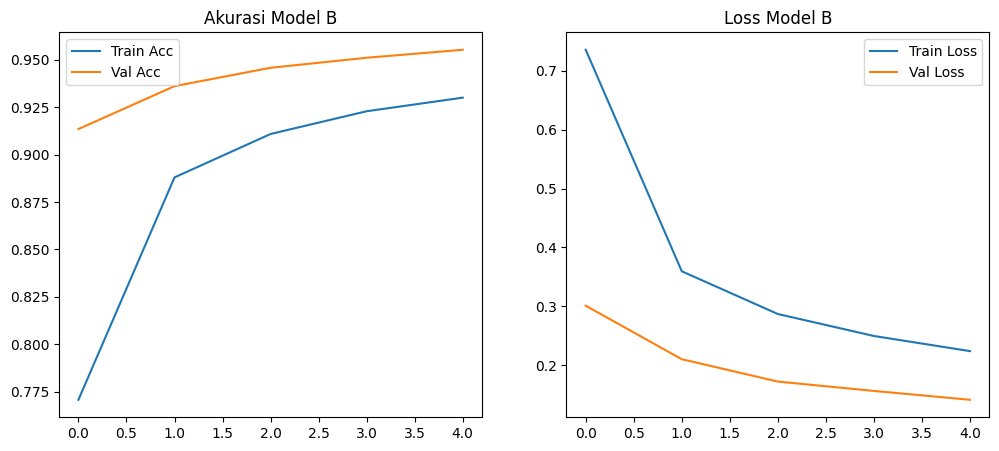

In [33]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Akurasi Model B')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Model B')
plt.legend()
plt.show()

In [35]:
data_citra = []      # gambar hasil preprocessing
label_citra = []     # label asli
file_names = list(uploaded.keys())

print(f"\nTotal file terunggah: {len(file_names)}")
print(file_names)


Total file terunggah: 30
['1_1.jpg', '1_2.jpg', '1_3.jpg', '1_4.jpg', '1_5.jpg', '1_6.jpg', '1_7.jpg', '1_8.jpg', '1_9.jpg', '1_10.jpg', '4_1.jpg', '4_2.jpg', '4_3.jpg', '4_4.jpg', '4_5.jpg', '4_6.jpg', '4_7.jpg', '4_8.jpg', '4_9.jpg', '4_10.jpg', '6_1.jpg', '6_2.jpg', '6_3.jpg', '6_4.jpg', '6_5.jpg', '6_6.jpg', '6_7.jpg', '6_8.jpg', '6_9.jpg', '6_10.jpg']


In [36]:
for filename in file_names:
    # Ambil label dari nama file, misal "2_4.png" -> label = 2
    true_label = int(filename.split('_')[0])
    label_citra.append(true_label)

    # Baca gambar (grayscale)
    img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

    # Inversi warna agar angka putih di atas latar hitam (sesuai MNIST)
    img_inverted = cv2.bitwise_not(img)

    # Resize ke 28x28
    img_resized = cv2.resize(img_inverted, (28, 28))

    # Normalisasi (0–1)
    img_normalized = img_resized / 255.0

    # Simpan hasil preprocessing
    data_citra.append(img_normalized)

In [37]:
#Ubah ke array numpy
data_citra = np.array(data_citra)
label_citra = np.array(label_citra)

print("Shape awal data citra:", data_citra.shape)

Shape awal data citra: (30, 28, 28)


In [38]:
#Tambah channel (dari 1 → 3)
data_rgb = np.concatenate([data_citra[..., np.newaxis]] * 3, axis=-1)

#Resize ke sesuai arsitektur pre-trained model
data_resized = np.array([cv2.resize(img, (32, 32)) for img in data_rgb])

print("Shape akhir data untuk model:", data_resized.shape)

Shape akhir data untuk model: (30, 32, 32, 3)


In [39]:
pred = model.predict(data_resized)
hasil = np.argmax(pred, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step


In [40]:
accuracy_own = np.mean(hasil == label_citra)
print(f"\nAkurasi Model B terhadap tulisan tangan sendiri: {accuracy_own:.2f}")


Akurasi Model B terhadap tulisan tangan sendiri: 0.83


In [41]:
benar = 0
print("\n=== HASIL PREDIKSI SETIAP CITRA ===\n")
for i, (true, pred, fname) in enumerate(zip(label_citra, hasil, file_names), start=1):
    status = "Benar" if true == pred else "Salah"
    if true == pred:
        benar += 1
    print(f"Citra ke-{i} ({fname}) → Label Asli: {true} | Prediksi Model: {pred} → {status}")


=== HASIL PREDIKSI SETIAP CITRA ===

Citra ke-1 (1_1.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-2 (1_2.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-3 (1_3.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-4 (1_4.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-5 (1_5.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-6 (1_6.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-7 (1_7.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-8 (1_8.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-9 (1_9.jpg) → Label Asli: 1 | Prediksi Model: 1 → Benar
Citra ke-10 (1_10.jpg) → Label Asli: 1 | Prediksi Model: 7 → Salah
Citra ke-11 (4_1.jpg) → Label Asli: 4 | Prediksi Model: 4 → Benar
Citra ke-12 (4_2.jpg) → Label Asli: 4 | Prediksi Model: 4 → Benar
Citra ke-13 (4_3.jpg) → Label Asli: 4 | Prediksi Model: 4 → Benar
Citra ke-14 (4_4.jpg) → Label Asli: 4 | Prediksi Model: 4 → Benar
Citra ke-15 (4_5.jpg) → Label Asli: 4 | Predik

In [42]:
total = len(label_citra)
akurasi = benar / total * 100
print(f"\nAkurasi model terhadap 30 citra tulisan tangan: {akurasi:.2f}%")


Akurasi model terhadap 30 citra tulisan tangan: 83.33%


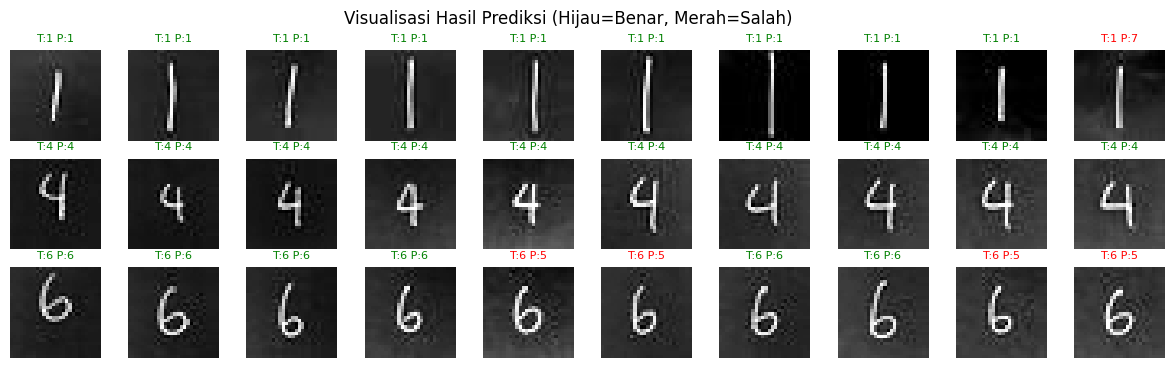

In [43]:
plt.figure(figsize=(15, 4))
for i in range(len(data_citra)):
    plt.subplot(3, 10, i + 1)
    plt.imshow(data_citra[i].squeeze(), cmap='gray')
    color = 'green' if label_citra[i] == hasil[i] else 'red'
    plt.title(f"T:{label_citra[i]} P:{hasil[i]}", color=color, fontsize=8)
    plt.axis('off')
plt.suptitle("Visualisasi Hasil Prediksi (Hijau=Benar, Merah=Salah)")
plt.show()
